# Heart disease

Here now we will work on first fing the relation doing the basic EDA

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np



In [2]:
df = pd.read_csv('/kaggle/input/playground-series-s6e2/train.csv')

In [3]:
df


,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,629995,56,0,1,110,226,0,0,132,0,0.0,1,0,7,Absence
629996,629996,54,1,4,128,249,1,2,150,0,0.0,2,0,3,Absence
629997,629997,67,1,4,130,275,0,0,149,0,0.0,1,2,7,Presence
629998,629998,52,1,4,140,199,0,2,157,0,0.0,1,0,6,Presence


In [4]:
!pip install pandas-profiling


In [5]:
from ydata_profiling import ProfileReport

prof = ProfileReport(df)
prof.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:05<00:00,  2.87it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

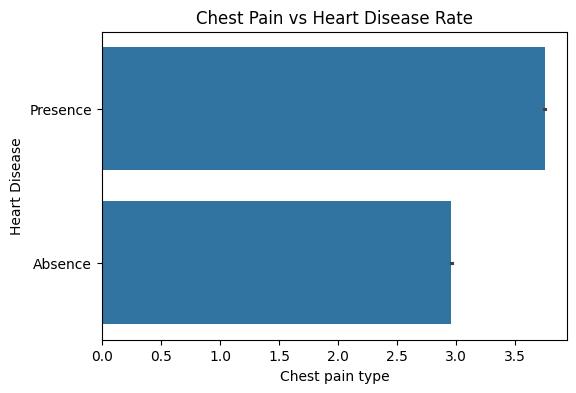

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(x='Chest pain type', y='Heart Disease', data=df)
plt.title("Chest Pain vs Heart Disease Rate")
plt.show()

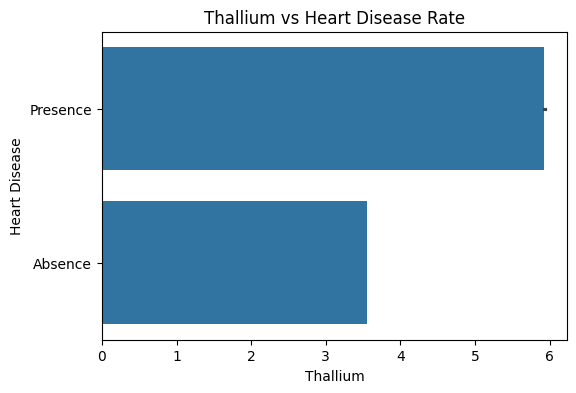

In [7]:
plt.figure(figsize=(6,4))
sns.barplot(x='Thallium', y='Heart Disease', data=df)
plt.title("Thallium vs Heart Disease Rate")
plt.show()

# Train Test Split

In [8]:
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Column Transformation

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

In [10]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse_output=False,drop='first'),['Chest pain type','Thallium'])
],remainder='passthrough')
transformer.fit_transform(X_train)
transformer.transform(X_test)

array([[0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 1. , ..., 3.5, 2. , 2. ],
       [0. , 0. , 1. , ..., 1.2, 3. , 2. ],
       ...,
       [0. , 1. , 0. , ..., 1.2, 1. , 3. ],
       [0. , 0. , 1. , ..., 1.6, 2. , 0. ],
       [0. , 1. , 0. , ..., 1. , 2. , 0. ]])

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

model = Pipeline(steps=[
    ('preprocessor', transformer),
    ('classifier', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

In [13]:
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Chest pain type',
                                                   'Thallium'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=300, n_jobs=-1,
                                        random_state=42))])

In [14]:
model.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Chest pain type',
                                                   'Thallium'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=300, n_jobs=-1,
                                        random_state=42))])

In [15]:
test_df = pd.read_csv('/kaggle/input/playground-series-s6e2/test.csv')

In [16]:
test_pred_proba = model.predict_proba(test_df)[:, 1]

In [17]:
submission = pd.DataFrame({
    'id': test_df['id'],
    'Heart Disease': test_pred_proba
})

submission.to_csv('submission.csv', index=False)